<a href="https://colab.research.google.com/github/LuciaPuppo897/Data_UY/blob/main/Trabajo_final_museos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis comparativo de exposiciones realizadas en los museos Azulejo, Subte y MuHar de Montevideo durante 2023 y 2024**


---


**Objetivo del proyecto**

El presente trabajo tiene como objetivo analizar la distribución y características de las exposiciones culturales desarrolladas en tres museos de Montevideo —Museo del Azulejo, Centro de Exposiciones Subte y Museo de Historia del Arte (MuHar)— durante los años 2023 y 2024.

A partir de este análisis, se pretende identificar patrones en la programación y diversidad cultural en la oferta museística de Montevideo, y generar una predicción sobre la posible oferta para el año 2025.

**Origen de los datos**

Los datos utilizados provienen del portal de Datos Abiertos de la Intendencia de Montevideo, específicamente del conjunto:
https://ckan.montevideo.gub.uy/dataset/museos

Los datasets utilizados corresponden a los museos mencionados para los años 2023 y 2024, y están disponibles en formato CSV. Consideramos que debido a la naturaleza de los dataset y el objetivo que nos propusimos, era necesario tener muestreos de 2 años como referencia, a su vez considerando que los dataset no superan los 50 datos en promedio,y que varias variables no se encuentran reflejadas en su totalidad en todos los museos, decidimos considerar para la escala de este trabajo las siguientes variables:
Se busca estudiar las exposiciones según variables como:

* Género de artistas
* Nacionalidad (local o internacional)
* Iniciativa del museo
* Público destinatario
* Tipo de actividad (exposición, conversatorio, etc.)


A continuación se subiran los dataset a ser utilizados:
* subte_2023.csv
* subte_2024.csv
* muhar_2023.csv
* muhar_2024.csv
* museo-del-azulejo_2023.csv
* museo-del-azulejo_2024.csv

Para su posterior limpieza, depuración y tratamiento se utilizara panda


In [ ]:
import os
from google.colab import files

# Eliminar los archivos existentes
def eliminar_archivos_anteriores():
    archivos = os.listdir('/content/')
    archivos_a_conservar = [
        'museo-del-azulejo_2023.csv',
        'subte_2023.csv',
        'museo-del-azulejo_2024.csv',
        'subte_2024.csv',
        'muhar_2023.csv',
        'muhar_2024.csv'
    ]

    for archivo in archivos:
        archivo_path = os.path.join('/content/', archivo)
        # Verificar que es un archivo, no un directorio, y que no esté en la lista de conservación
        if archivo not in archivos_a_conservar and os.path.isfile(archivo_path):
            os.remove(archivo_path)
            print(f'Archivo {archivo} eliminado.')

# Llamar la función para eliminar los archivos anteriores
eliminar_archivos_anteriores()

# Subir los nuevos archivos CSV
uploaded = files.upload()

# Ver los archivos subidos
uploaded.keys()



Archivo muhar_2024 (1).csv eliminado.
Archivo muhar_2023 (1).csv eliminado.
Archivo subte_2023 (1).csv eliminado.
Archivo subte_2024 (1).csv eliminado.
Archivo museo-del-azulejo_2023 (1).csv eliminado.
Archivo museo-del-azulejo_2024 (1).csv eliminado.


Saving muhar_2023.csv to muhar_2023 (1).csv
Saving subte_2023.csv to subte_2023 (1).csv
Saving museo-del-azulejo_2024.csv to museo-del-azulejo_2024 (1).csv
Saving museo-del-azulejo_2023.csv to museo-del-azulejo_2023 (1).csv
Saving muhar_2024.csv to muhar_2024 (1).csv
Saving subte_2024.csv to subte_2024 (1).csv


dict_keys(['muhar_2023 (1).csv', 'subte_2023 (1).csv', 'museo-del-azulejo_2024 (1).csv', 'museo-del-azulejo_2023 (1).csv', 'muhar_2024 (1).csv', 'subte_2024 (1).csv'])

Se cambió el sufijo (1) en los archivos para hacerlos más comprensibles y facilitar su posterior referencia en el análisis.

In [ ]:
import os

# Lista de archivos a conservar
archivos_a_conservar = [
    'museo-del-azulejo_2023.csv',
    'subte_2023.csv',
    'museo-del-azulejo_2024.csv',
    'subte_2024.csv',
    'muhar_2023.csv',
    'muhar_2024.csv'
]

# Listar los archivos en el directorio actual
archivos = os.listdir('/content/')

# Eliminar archivos que no están en la lista de conservación
for archivo in archivos:
    archivo_path = os.path.join('/content/', archivo)
    # Verificar que es un archivo y no un directorio
    if os.path.isfile(archivo_path) and archivo not in archivos_a_conservar:
        os.remove(archivo_path)
        print(f'Archivo {archivo} eliminado.')

# Verificar que solo queden los archivos correctos
os.listdir('/content/')



**Limpieza de Datos:**

Antes de realizar cualquier análisis, fue necesario llevar a cabo una limpieza y estandarización de los datos debido a las inconsistencias encontradas en los diferentes conjuntos de datos.
**Limitaciones:** Es importante señalar que los conjuntos de datos utilizados presentan diferencias en sus formatos y valores. Algunos archivos incluyen tanto el mes de inicio como el mes de finalización de las actividades, mientras que otros solo contienen la fecha, o no contienen una de las dos claves (inicio o fin) Debido a esta discrepancia, se decidió no tomar en cuenta la duración de las actividades, ya que los valores inconsistentes dificultan el cálculo preciso de este parámetro.

Transformaciones aplicadas:
* Conversión de Meses: En un inicio se intento calcular la duración de las actividades, como se describio previamente esto fue descartado.

* Correción de caracteres: se aplico una trasnformación a la nomeclatura de los datos para que sean más legibles y comprensibles a la hora de ser analizados y presendatos

* Estandarización de Categorías: Para otras columnas con valores categóricos, como público_destinatario y Actividades, también se realizó un proceso de estandarización. Esto implicó unificar las distintas formas en que se escribían los valores (por ejemplo, "todo público", "adolescentes", etc.), para asegurar que las categorías fueran consistentes a través de todos los datasets.

* Manejo de Valores Nulos y Erróneos: Se eliminaron o imputaron los valores nulos en las columnas clave, como Año, Museo y Actividades, para asegurar que los análisis posteriores fueran precisos y no estuvieran sesgados por la falta de datos.Por ejemplo ciertos dataset no contaban con la columna “museo” pero gracias a que se sabe a qué museo pertenecían se agrego para poder hacer la comparación más fácil. Con la columna *Actividades* se tuvo que tomar en cuenta que en algunos dataset se le denominaba *Actividad*


**Estandarización de la columna actividad/actividades:**


* En primer lugar se cambio el nombre de la columna *actividad* en el dataset  **Muhar_2024** y *actividades* en el dataset **Muhar_2023** que corresponda con la nomeclatura de los demás datasets, para posteriormente seguir con la estandarización de la columna Actividades




In [ ]:
import pandas as pd

# Función para renombrar la columna 'Actividad' a 'Actividades' y estandarizar las categorías
def estandarizar_actividades(df):
    # Eliminar espacios extra en los nombres de las columnas
    df.columns = df.columns.str.strip()

    if 'Actividad' in df.columns:
        df.rename(columns={'Actividad': 'Actividades'}, inplace=True)
    elif 'actividades' in df.columns:  # Check for lowercase 'actividades'
        df.rename(columns={'actividades': 'Actividades'}, inplace=True)

    df['Actividades'] = df['Actividades'].str.strip().str.lower()


    # Reemplazar los nombres de las categorías mal codificadas
    df['Actividades'] = df['Actividades'].str.replace('exposici¢n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('exposiciã³n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('act. didã¡cticas', 'act. didacticas')
    df['Actividades'] = df['Actividades'].str.replace('act. did cticas', 'act. didacticas')


    # Estandarizar la columna 'Actividades'
    df['Actividades'] = df['Actividades'].str.strip().str.lower().replace({
        'exposición': 'exposición',
        'charla': 'charla',
        'taller': 'taller',
        'conversatorio': 'conversatorio',
        'act. didacticas': 'act. didacticas',
        'ciclo de conferencias': 'charla'
    }).str.capitalize()  # Convertir a mayúsculas la primera letra de cada palabra

    return df

# Cargar los archivos CSV
subte_2023 = pd.read_csv('/content/subte_2023.csv', encoding='latin-1')
subte_2024 = pd.read_csv('/content/subte_2024.csv', encoding='latin-1')
muhar_2023 = pd.read_csv('/content/muhar_2023.csv', encoding='latin-1')
muhar_2024 = pd.read_csv('/content/muhar_2024.csv', encoding='latin-1')
azulejo_2023 = pd.read_csv('/content/museo-del-azulejo_2023.csv', encoding='latin-1')
azulejo_2024 = pd.read_csv('/content/museo-del-azulejo_2024.csv', encoding='latin-1')

# Aplicar la estandarización a los DataFrames cargados
subte_2023 = estandarizar_actividades(subte_2023)
subte_2024 = estandarizar_actividades(subte_2024)
muhar_2024 = estandarizar_actividades(muhar_2024)
muhar_2023 = estandarizar_actividades(muhar_2023)
azulejo_2023 = estandarizar_actividades(azulejo_2023)
azulejo_2024 = estandarizar_actividades(azulejo_2024)

# Verificar los resultados de la estandarización en todos los dataset
print("Resultados de la estandarización en muhar_2023:")
print(muhar_2023[['Actividades']].head())
print("Resultados de la estandarización en muhar_2024:")
print(muhar_2024[['Actividades']].head())
print("Resultados de la estandarización en azulejos_2023:")
print(azulejo_2023[['Actividades']].head())
print("Resultados de la estandarización en azulejos_2024:")
print(azulejo_2024[['Actividades']].head())
print("Resultados de la estandarización en subte_2023:")
print(subte_2023[['Actividades']].head())
print("Resultados de la estandarización en subte_2024:")
print(subte_2024[['Actividades']].head())



A continución se limpio y estandarizo la columna *publico destinatario*

In [ ]:
import pandas as pd

# Función para corregir los caracteres mal codificados y estandarizar la columna 'público_destinatario'
def estandarizar_publico_destinatario(df):
    # Eliminar espacios extra en los nombres de las columnas
    df.columns = df.columns.str.strip()

    # Renombrar las columnas si tiene problemas de codificación
    if 'pÃºblico_destinatario' in df.columns:
        df.rename(columns={'pÃºblico_destinatario': 'público_destinatario'}, inplace=True)
    elif 'p£blico_destinatario' in df.columns:
        df.rename(columns={'p£blico_destinatario': 'público_destinatario'}, inplace=True)

    # Verificar que la columna 'público_destinatario' esté correctamente nombrada
    if 'público_destinatario' in df.columns:
        # Convertir la columna 'público_destinatario' a minúsculas
        df['público_destinatario'] = df['público_destinatario'].str.strip().str.lower()

        # Reemplazar los nombres de las categorías mal codificadas
        df['público_destinatario'] = df['público_destinatario'].str.replace('todo pãºblico', 'todo público')
        df['público_destinatario'] = df['público_destinatario'].str.replace('todo p£blico', 'todo público')

        # Estandarizar las categorías de la columna 'público_destinatario'
        df['público_destinatario'] = df['público_destinatario'].str.strip().str.lower().replace({
          'todo público': 'todo público',
          'infancia': 'infancia',
          'adolescencia': 'adolescencia',
          'adultos': 'adultos',
          'situación de discapacidad': 'situación de discapacidad'
        }).str.capitalize()

        return df


# Cargar los archivos CSV que has subido
subte_2023 = pd.read_csv('/content/subte_2023.csv', encoding='latin-1')
subte_2024 = pd.read_csv('/content/subte_2024.csv', encoding='latin-1')
muhar_2023 = pd.read_csv('/content/muhar_2023.csv', encoding='latin-1')
muhar_2024 = pd.read_csv('/content/muhar_2024.csv', encoding='latin-1')
azulejo_2023 = pd.read_csv('/content/museo-del-azulejo_2023.csv', encoding='latin-1')
azulejo_2024 = pd.read_csv('/content/museo-del-azulejo_2024.csv', encoding='latin-1')

# Aplicar la estandarización a los DataFrames cargados
subte_2023 = estandarizar_publico_destinatario(subte_2023)
subte_2024 = estandarizar_publico_destinatario(subte_2024)
muhar_2023 = estandarizar_publico_destinatario(muhar_2023)
muhar_2024 = estandarizar_publico_destinatario(muhar_2024)
azulejo_2023 = estandarizar_publico_destinatario(azulejo_2023)
azulejo_2024 = estandarizar_publico_destinatario(azulejo_2024)

# Verificar los resultados de la estandarización en 'público_destinatario'
print("Resultados de la estandarización en muhar_2024:")
print(subte_2023[['público_destinatario']].head())

print("Resultados de la estandarización en muhar_2023:")
print(muhar_2023[['público_destinatario']].head())
print("Resultados de la estandarización en azulejos_2023:")
print(azulejo_2023[['público_destinatario']].head())
print("Resultados de la estandarización en azulejos_2024:")
print(azulejo_2024[['público_destinatario']].head())
print("Resultados de la estandarización en subte_2023:")
print(subte_2023[['público_destinatario']].head())
print("Resultados de la estandarización en subte_2024:")
print(subte_2024[['público_destinatario']].head(15))


Resultados de la estandarización en muhar_2024:
  público_destinatario
0         Todo público
1         Todo público
2         Todo público
3         Todo público
4         Todo público
Resultados de la estandarización en muhar_2023:
  público_destinatario
0         Todo público
1         Todo público
2         Todo público
3         Todo público
4         Todo público
Resultados de la estandarización en azulejos_2023:
  público_destinatario
0         Todo público
1         Todo público
2         Todo público
3         Todo público
4         Todo público
Resultados de la estandarización en azulejos_2024:
  público_destinatario
0         Todo público
1         Adolescencia
2         Todo público
3             Infancia
4         Todo público
Resultados de la estandarización en subte_2023:
  público_destinatario
0         Todo público
1         Todo público
2         Todo público
3         Todo público
4         Todo público
Resultados de la estandarización en subte_2024:
   público_desti

Gráficos demostrativos de los diferentes públicos destinatarios

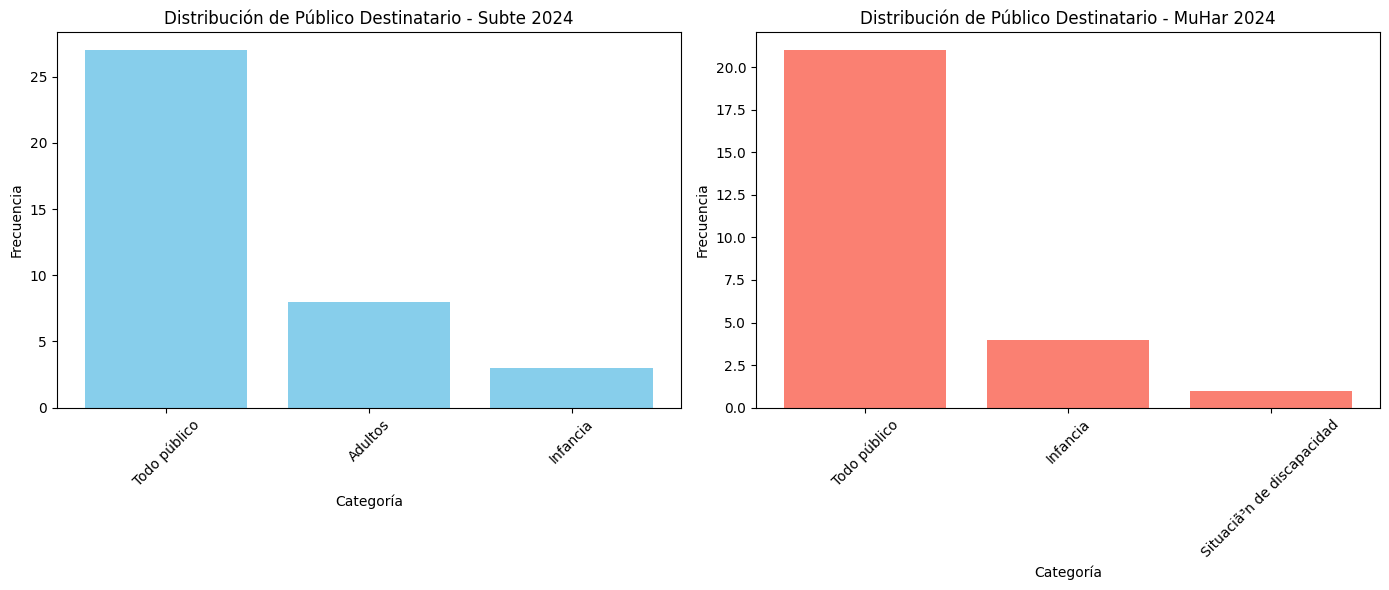

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar las categorías de público_destinatario para subte_2024 y muhar_2024
subte_2024_counts = subte_2024['público_destinatario'].value_counts()
muhar_2024_counts = muhar_2023['público_destinatario'].value_counts()

# Crear una figura para mostrar ambas gráficas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica para subte_2024
ax[0].bar(subte_2024_counts.index, subte_2024_counts.values, color='skyblue')
ax[0].set_title('Distribución de Público Destinatario - Subte 2024')
ax[0].set_xlabel('Categoría')
ax[0].set_ylabel('Frecuencia')
ax[0].tick_params(axis='x', rotation=45)

# Gráfica para muhar_2023
ax[1].bar(muhar_2024_counts.index, muhar_2024_counts.values, color='salmon')
ax[1].set_title('Distribución de Público Destinatario - MuHar 2024')
ax[1].set_xlabel('Categoría')
ax[1].set_ylabel('Frecuencia')
ax[1].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


Estandarizacion de *Iniciativa del museo*, y transformación en valores boolenos (*true* y *false*) para un mejor manejo en el analisís y predicción

In [ ]:
import pandas as pd

# Función para corregir los caracteres mal codificados y estandarizar la columna 'iniciativa_museo'
def estandarizar_iniciativa_museo(df):
    # Eliminar espacios extra en los nombres de las columnas
    df.columns = df.columns.str.strip()

    # Renombrar la columna 'iniciativa_museo' si tiene problemas de codificación
    if 'iniciativa_museo' in df.columns:
        # Convertir la columna 'iniciativa_museo' a minúsculas
        df['iniciativa_museo'] = df['iniciativa_museo'].str.strip().str.lower()

        # Reemplazar valores mal codificados
        df['iniciativa_museo'] = df['iniciativa_museo'].replace({
            'sí': 'sí',
            'no': 'no',
            'si': 'sí',
            'non': 'no'
        })

        df['iniciativa_museo'] = df['iniciativa_museo'].map({'sí': True, 'no': False})

    return df

# Cargar los archivos CSV que has subido
subte_2023 = pd.read_csv('/content/subte_2023.csv', encoding='latin-1')
subte_2024 = pd.read_csv('/content/subte_2024.csv', encoding='latin-1')
muhar_2023 = pd.read_csv('/content/muhar_2023.csv', encoding='latin-1')
muhar_2024 = pd.read_csv('/content/muhar_2024.csv', encoding='latin-1')
azulejo_2023 = pd.read_csv('/content/museo-del-azulejo_2023.csv', encoding='latin-1')
azulejo_2024 = pd.read_csv('/content/museo-del-azulejo_2024.csv', encoding='latin-1')

# Aplicar la estandarización a los DataFrames cargados
subte_2023 = estandarizar_iniciativa_museo(subte_2023)
subte_2024 = estandarizar_iniciativa_museo(subte_2024)
muhar_2023 = estandarizar_iniciativa_museo(muhar_2023)
muhar_2024 = estandarizar_iniciativa_museo(muhar_2024)
azulejo_2023 = estandarizar_iniciativa_museo(azulejo_2023)
azulejo_2024 = estandarizar_iniciativa_museo(azulejo_2024)

# Verificar los resultados de la estandarización en 'iniciativa_museo'
print("Resultados de la estandarización en muhar_2024:")
print(muhar_2024[['iniciativa_museo']].head())

print("Resultados de la estandarización en muhar_2023:")
print(muhar_2023[['iniciativa_museo']].head())


Resultados de la estandarización en muhar_2024:
   iniciativa_museo
0             False
1              True
2             False
3             False
4             False
Resultados de la estandarización en muhar_2023:
   iniciativa_museo
0             False
1              True
2              True
3              True
4              True
